# TensorFlow Basics

Note: If running this notebook directly, make sure you are running your Jupyter kernel in an environment with TensorFlow installed. Some useful packages to import first:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt    # You may need to install this into your environment first with `conda install matplotlib`

### Basic TensorFlow test from the installation instructions

In [2]:
 import tensorflow as tf
 hello = tf.constant('Hello, TensorFlow!')
 sess = tf.Session()
 print(sess.run(hello))

b'Hello, TensorFlow!'


### Define a simple TensorFlow graph

The example from the TensorFlow Introduction slides:

In [3]:
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0, dtype=tf.float32)
sum_a_b = tf.add(a, b)

# Using the Python "with" as a context manager
with tf.Session() as sess:
    print(sess.run(sum_a_b)) # Prints “7.0” to the screen 

7.0


The previous graph only produces a constant output. Not particularly interesting. To create a similar graph that can acccept variable inputs: 

In [4]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
sum_a_b = tf.add(a, b)

with tf.Session() as sess:
    feed_dict = {a: 3.0, b: 4.0}
    print('1st Result: {0}'.format(sess.run(sum_a_b, feed_dict=feed_dict))) # Prints “7.0” to the screen 
    
    feed_dict = {a: 2015, b: 2020}
    print('2nd Result: {0}'.format(sess.run(sum_a_b, feed_dict=feed_dict)))

1st Result: 7.0
2nd Result: 4035.0


# MNIST Example

The MNIST dataset is very popular machine learning dataset, consisting of 70000 grayscale images of handwritten digits, of dimensions 28x28. We'll be using it as our example for this section of the tutorial, with the goal being to predict which the digit is in each image.

<img src="Figures/mnist.png", width="500">

Since it's such a common (and small) dataset, TensorFlow has commands for downloading and formatting the dataset conveniently baked in already:

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Let's take a look at how the data is organized:

Training image data: (55000, 784)
Validation image data: (5000, 784)
Testing image data: (10000, 784)
28 x 28 = 784

Test Labels: (10000, 10)
Label distribution:[(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]

Train image 1 is labelled one-hot as [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


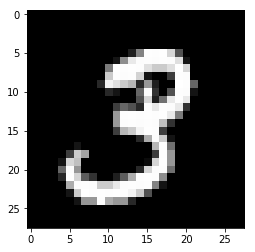

In [6]:
# Dataset statistics
print('Training image data: {0}'.format(mnist.train.images.shape))
print('Validation image data: {0}'.format(mnist.validation.images.shape))
print('Testing image data: {0}'.format(mnist.test.images.shape))
print('28 x 28 = {0}'.format(28*28))

print('\nTest Labels: {0}'.format(mnist.test.labels.shape))
labels = np.arange(10)
num_labels = np.sum(mnist.test.labels, axis=0, dtype=np.int)
print('Label distribution:{0}'.format(list(zip(labels, num_labels))))

# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(mnist.train.labels[1,:]))
image = np.reshape(mnist.train.images[1,:],[28,28])
plt.imshow(image, cmap='gray')

### Logistic Regression Model